In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('ufcdata/preprocessed_data.csv')
df.head()

,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,...,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,Red,True,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,...,0,0,1,0,0,0,0,1,0,0
1,Red,True,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,...,0,0,1,0,0,0,0,0,1,0
2,Red,False,3,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,...,0,0,1,0,0,0,0,1,0,0
3,Blue,False,3,0.0,4.0,0.0,17.000000,14.000000,13.750000,11.000000,...,0,0,0,0,0,1,0,1,0,0
4,Blue,False,3,0.0,1.0,0.0,17.000000,14.500000,2.500000,2.000000,...,0,0,0,0,1,0,0,0,1,0


In [28]:
#Partitioning the dataset to X as predictors, and y as target
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3592 entries, 0 to 3591
Columns: 160 entries, Winner to R_Stance_Switch
dtypes: bool(1), float64(134), int64(24), object(1)
memory usage: 4.4+ MB


From the results above, we can see that there are two non-numeric features, winner and title_bout. The winner will be used as taget but the title bout will remain as a predictor and will be encoded with dummy variables.

In [30]:
#Encoding the title_bout feature
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 0] = labelencoder_X_1.fit_transform(X[:, 0])


#Encoding Y
labelencoder_y = LabelEncoder()
y[:] = labelencoder_y.fit_transform(y[:])


In [36]:
#Checking for proper dimensions of predictors, target and the encoding of title_bout
print("X Dimension: ",X.shape)
print()
print("y Dimension: ",y.shape)
print()
print("First row title bout value: 1 is True, 0 is False ==> ",X[0,0])
print("First row corner value: 1 is Red, 0 is Blue ==> ",y[3])
df.head()


X Dimension:  (3592, 159)

y Dimension:  (3592,)

First row title bout value: 1 is True, 0 is False ==>  1
First row corner value: 1 is Red, 0 is Blue ==>  0


,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,...,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,1,True,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,...,0,0,1,0,0,0,0,1,0,0
1,1,True,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,...,0,0,1,0,0,0,0,0,1,0
2,1,False,3,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,...,0,0,1,0,0,0,0,1,0,0
3,0,False,3,0.0,4.0,0.0,17.000000,14.000000,13.750000,11.000000,...,0,0,0,0,0,1,0,1,0,0
4,0,False,3,0.0,1.0,0.0,17.000000,14.500000,2.500000,2.000000,...,0,0,0,0,1,0,0,0,1,0


From the results above, we can see that we have properly encoded the feature

In [37]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [38]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
#keras for ANN
import keras
from keras.models import Sequential
from keras.layers import Dense


In [44]:
#ANN Model
classifier = Sequential()
classifier.add(Dense(output_dim = 50,init = 'uniform', activation = 'relu', input_dim = 159))
classifier.add(Dense(output_dim = 50,init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 1,init = 'uniform', activation = 'sigmoid'))

#compiling the model
classifier.compile(optimizer = 'adam',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

In [45]:
pred1 = classifier.fit(X_train, y_train,
              batch_size = 900,
              nb_epoch = 100)

Epoch 1/100
2873/2873 [==============================] - 0s 42us/step - loss: 0.6912 - accuracy: 0.6175
Epoch 2/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6837 - accuracy: 0.6700
Epoch 3/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6734 - accuracy: 0.6700
Epoch 4/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6582 - accuracy: 0.6700
Epoch 5/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6381 - accuracy: 0.6700
Epoch 6/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.6156 - accuracy: 0.6700
Epoch 7/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.5983 - accuracy: 0.6700
Epoch 8/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.5901 - accuracy: 0.6700
Epoch 9/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.5877 - accuracy: 0.6700
Epoch 10/100
2873/2873 [==============================] - 0s 4us/step - 

2873/2873 [==============================] - 0s 5us/step - loss: 0.2765 - accuracy: 0.9005
Epoch 80/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2706 - accuracy: 0.8980
Epoch 81/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2650 - accuracy: 0.9022
Epoch 82/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2573 - accuracy: 0.9102
Epoch 83/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2501 - accuracy: 0.9161
Epoch 84/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2414 - accuracy: 0.9217
Epoch 85/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2356 - accuracy: 0.9192
Epoch 86/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2269 - accuracy: 0.9255
Epoch 87/100
2873/2873 [==============================] - 0s 5us/step - loss: 0.2206 - accuracy: 0.9266
Epoch 88/100
2873/2873 [==============================] - 0s 4us/step - loss:

In [48]:
pred1.history

{'loss': [0.6911927901864509,
  0.6836938540403577,
  0.6733949672374998,
  0.6582445857046043,
  0.6381186146873902,
  0.6156433352476373,
  0.5982694188726102,
  0.5901396073948163,
  0.5877394112111631,
  0.5841450428572673,
  0.5790989297713464,
  0.5747866716444637,
  0.5725908041249324,
  0.5706678173743679,
  0.5679425227903465,
  0.5650607445204336,
  0.562181362904948,
  0.5600689104468076,
  0.5578310933214341,
  0.5554673703049601,
  0.5528382781985077,
  0.5503519466850262,
  0.5485863820667513,
  0.5466810685186655,
  0.5437509212558626,
  0.5414752084496044,
  0.5390068471867409,
  0.5363303719810024,
  0.533640731472277,
  0.5308201908442852,
  0.5279178788468599,
  0.5251832031390412,
  0.5219518671332857,
  0.5194484050830731,
  0.5157850565517816,
  0.5119122249134899,
  0.5082077893321206,
  0.5045746682290204,
  0.5014468408236717,
  0.49726701642717586,
  0.49534108806395005,
  0.4914194121930892,
  0.4880259702461255,
  0.48360745812640804,
  0.479303415233235,
  

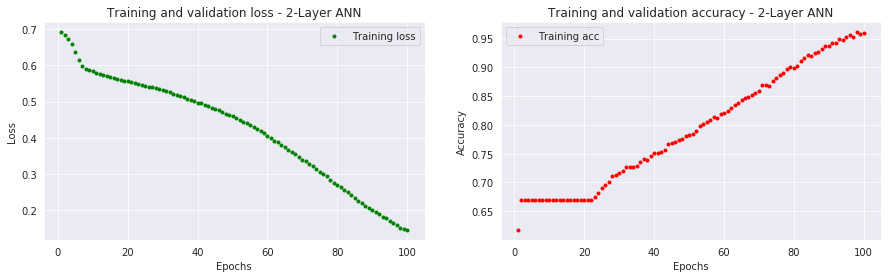

In [51]:
#Extracting CNN Results for Visualization
hist_ann = pred1.history
loss_values = hist_ann['loss']
acc_values = hist_ann['accuracy'] 


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')


plt.title('Training and validation loss - 2-Layer ANN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.title('Training and validation accuracy - 2-Layer ANN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('fight_pred1.png')
plt.show()

To ensure there is no bias or accident that the training results was really high, K-Fold will be utilize to ensure consistency of the model.

In [52]:
#K-Fold validation model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [55]:
#function to introduce model training in keras with sklearn k-fold
def build_predictor():
    #ANN Model
    predictor = Sequential()
    predictor.add(Dense(output_dim = 50,init = 'uniform', activation = 'relu', input_dim = 159))
    predictor.add(Dense(output_dim = 50,init = 'uniform', activation = 'relu'))
    predictor.add(Dense(output_dim = 1,init = 'uniform', activation = 'sigmoid'))

    #compiling the model
    predictor.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy',
                      metrics = ['accuracy'])
    return predictor

In [58]:
classifier_sk = KerasClassifier(build_fn = build_predictor, batch_size = 900, epochs = 100)

In [59]:
accuracies = cross_val_score(estimator = classifier_sk,
                             X = X_train,
                             y = y_train,
                             cv = 10)

Epoch 1/100
2585/2585 [==============================] - 0s 45us/step - loss: 0.6910 - accuracy: 0.6317
Epoch 2/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.6844 - accuracy: 0.6723
Epoch 3/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.6763 - accuracy: 0.6723
Epoch 4/100
2585/2585 [==============================] - 0s 6us/step - loss: 0.6646 - accuracy: 0.6723
Epoch 5/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.6500 - accuracy: 0.6723
Epoch 6/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.6328 - accuracy: 0.6723
Epoch 7/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.6150 - accuracy: 0.6723
Epoch 8/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.6003 - accuracy: 0.6723
Epoch 9/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.5921 - accuracy: 0.6723
Epoch 10/100
2585/2585 [==============================] - 0s 5us/step - 

2585/2585 [==============================] - 0s 5us/step - loss: 0.2242 - accuracy: 0.9319
Epoch 80/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.2165 - accuracy: 0.9354
Epoch 81/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.2096 - accuracy: 0.9373
Epoch 82/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.2021 - accuracy: 0.9424
Epoch 83/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.1945 - accuracy: 0.9466
Epoch 84/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.1876 - accuracy: 0.9513
Epoch 85/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.1803 - accuracy: 0.9528
Epoch 86/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.1725 - accuracy: 0.9590
Epoch 87/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.1667 - accuracy: 0.9613
Epoch 88/100
2585/2585 [==============================] - 0s 5us/step - loss:

2585/2585 [==============================] - 0s 5us/step - loss: 0.3929 - accuracy: 0.8352
Epoch 58/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.3856 - accuracy: 0.8441
Epoch 59/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.3783 - accuracy: 0.8464
Epoch 60/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.3707 - accuracy: 0.8484
Epoch 61/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.3629 - accuracy: 0.8549
Epoch 62/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.3554 - accuracy: 0.8607
Epoch 63/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.3464 - accuracy: 0.8665
Epoch 64/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.3394 - accuracy: 0.8708
Epoch 65/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.3328 - accuracy: 0.8708
Epoch 66/100
2585/2585 [==============================] - 0s 4us/step - loss:

2585/2585 [==============================] - 0s 5us/step - loss: 0.5265 - accuracy: 0.7052
Epoch 36/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.5242 - accuracy: 0.7099
Epoch 37/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.5221 - accuracy: 0.7118
Epoch 38/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.5200 - accuracy: 0.7141
Epoch 39/100
2585/2585 [==============================] - 0s 4us/step - loss: 0.5180 - accuracy: 0.7191
Epoch 40/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.5158 - accuracy: 0.7219
Epoch 41/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.5136 - accuracy: 0.7269
Epoch 42/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.5112 - accuracy: 0.7308
Epoch 43/100
2585/2585 [==============================] - 0s 5us/step - loss: 0.5091 - accuracy: 0.7323
Epoch 44/100
2585/2585 [==============================] - 0s 4us/step - loss:

2586/2586 [==============================] - 0s 5us/step - loss: 0.5828 - accuracy: 0.6725
Epoch 14/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5775 - accuracy: 0.6725
Epoch 15/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5729 - accuracy: 0.6725
Epoch 16/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5701 - accuracy: 0.6725
Epoch 17/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5672 - accuracy: 0.6725
Epoch 18/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5645 - accuracy: 0.6740
Epoch 19/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5610 - accuracy: 0.6779
Epoch 20/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5575 - accuracy: 0.6856
Epoch 21/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5538 - accuracy: 0.6906
Epoch 22/100
2586/2586 [==============================] - 0s 5us/step - loss:

2586/2586 [==============================] - 0s 5us/step - loss: 0.1534 - accuracy: 0.9667
Epoch 92/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1462 - accuracy: 0.9683
Epoch 93/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1414 - accuracy: 0.9729
Epoch 94/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1340 - accuracy: 0.9722
Epoch 95/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1288 - accuracy: 0.9745
Epoch 96/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1225 - accuracy: 0.9753
Epoch 97/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1172 - accuracy: 0.9783
Epoch 98/100
2586/2586 [==============================] - 0s 6us/step - loss: 0.1117 - accuracy: 0.9807
Epoch 99/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1063 - accuracy: 0.9822
Epoch 100/100
287/287 [==============================] - 0s 178us/step
Epoch 

2586/2586 [==============================] - 0s 6us/step - loss: 0.2946 - accuracy: 0.8917
Epoch 70/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.2866 - accuracy: 0.8952
Epoch 71/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.2788 - accuracy: 0.9010
Epoch 72/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.2718 - accuracy: 0.9033
Epoch 73/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.2645 - accuracy: 0.9107
Epoch 74/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.2587 - accuracy: 0.9084
Epoch 75/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.2505 - accuracy: 0.9134
Epoch 76/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.2411 - accuracy: 0.9215
Epoch 77/100
2586/2586 [==============================] - 0s 6us/step - loss: 0.2358 - accuracy: 0.9238
Epoch 78/100
2586/2586 [==============================] - 0s 5us/step - loss:

2586/2586 [==============================] - 0s 5us/step - loss: 0.4739 - accuracy: 0.7630
Epoch 48/100
2586/2586 [==============================] - 0s 6us/step - loss: 0.4704 - accuracy: 0.7641
Epoch 49/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4669 - accuracy: 0.7684
Epoch 50/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4625 - accuracy: 0.7722
Epoch 51/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4586 - accuracy: 0.7761
Epoch 52/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4544 - accuracy: 0.7788
Epoch 53/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4502 - accuracy: 0.7815
Epoch 54/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.4457 - accuracy: 0.7862
Epoch 55/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4409 - accuracy: 0.7904
Epoch 56/100
2586/2586 [==============================] - 0s 5us/step - loss:

2586/2586 [==============================] - 0s 5us/step - loss: 0.5481 - accuracy: 0.6879
Epoch 26/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5452 - accuracy: 0.6930
Epoch 27/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.5424 - accuracy: 0.7015
Epoch 28/100
2586/2586 [==============================] - 0s 6us/step - loss: 0.5395 - accuracy: 0.7069
Epoch 29/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5365 - accuracy: 0.7146
Epoch 30/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5334 - accuracy: 0.7220
Epoch 31/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5302 - accuracy: 0.7289
Epoch 32/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5268 - accuracy: 0.7343
Epoch 33/100
2586/2586 [==============================] - 0s 6us/step - loss: 0.5234 - accuracy: 0.7386
Epoch 34/100
2586/2586 [==============================] - 0s 5us/step - loss:

2586/2586 [==============================] - 0s 5us/step - loss: 0.6820 - accuracy: 0.6671
Epoch 4/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.6740 - accuracy: 0.6671
Epoch 5/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.6627 - accuracy: 0.6671
Epoch 6/100
2586/2586 [==============================] - 0s 4us/step - loss: 0.6482 - accuracy: 0.6671
Epoch 7/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.6317 - accuracy: 0.6671
Epoch 8/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.6156 - accuracy: 0.6671
Epoch 9/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.6022 - accuracy: 0.6671
Epoch 10/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5950 - accuracy: 0.6671
Epoch 11/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5927 - accuracy: 0.6671
Epoch 12/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.590

Epoch 82/100
2586/2586 [==============================] - 0s 6us/step - loss: 0.2180 - accuracy: 0.9339
Epoch 83/100
2586/2586 [==============================] - 0s 6us/step - loss: 0.2100 - accuracy: 0.9354
Epoch 84/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.2031 - accuracy: 0.9389
Epoch 85/100
2586/2586 [==============================] - 0s 6us/step - loss: 0.1969 - accuracy: 0.9443
Epoch 86/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1908 - accuracy: 0.9447
Epoch 87/100
2586/2586 [==============================] - 0s 6us/step - loss: 0.1844 - accuracy: 0.9490
Epoch 88/100
2586/2586 [==============================] - 0s 6us/step - loss: 0.1788 - accuracy: 0.9509
Epoch 89/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1732 - accuracy: 0.9551
Epoch 90/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.1673 - accuracy: 0.9586
Epoch 91/100
2586/2586 [==============================] - 0s 5us

2586/2586 [==============================] - 0s 5us/step - loss: 0.3834 - accuracy: 0.8314
Epoch 61/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.3761 - accuracy: 0.8411
Epoch 62/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.3688 - accuracy: 0.8469
Epoch 63/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.3606 - accuracy: 0.8515
Epoch 64/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.3539 - accuracy: 0.8546
Epoch 65/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.3444 - accuracy: 0.8635
Epoch 66/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.3369 - accuracy: 0.8685
Epoch 67/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.3297 - accuracy: 0.8716
Epoch 68/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.3201 - accuracy: 0.8794
Epoch 69/100
2586/2586 [==============================] - 0s 5us/step - loss:

2586/2586 [==============================] - 0s 5us/step - loss: 0.5086 - accuracy: 0.7367
Epoch 39/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5044 - accuracy: 0.7425
Epoch 40/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.5002 - accuracy: 0.7517
Epoch 41/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4957 - accuracy: 0.7568
Epoch 42/100
2586/2586 [==============================] - 0s 6us/step - loss: 0.4912 - accuracy: 0.7610
Epoch 43/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4865 - accuracy: 0.7672
Epoch 44/100
2586/2586 [==============================] - 0s 5us/step - loss: 0.4816 - accuracy: 0.7707
Epoch 45/100
2586/2586 [==============================] - 0s 6us/step - loss: 0.4763 - accuracy: 0.7742
Epoch 46/100
2586/2586 [==============================] - 0s 6us/step - loss: 0.4714 - accuracy: 0.7776
Epoch 47/100
2586/2586 [==============================] - 0s 5us/step - loss:

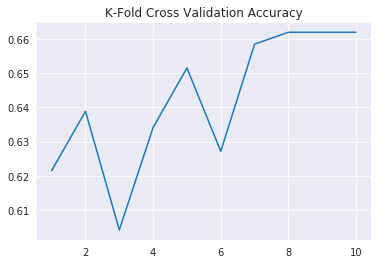

In [66]:
plt.plot(range(1,11),accuracies)
plt.xlabel(ran)
plt.title("K-Fold Cross Validation Accuracy")
plt.show()

In [65]:
accuracies

array([0.62152779, 0.6388889 , 0.60416669, 0.63414633, 0.65156794,
       0.62717772, 0.65853661, 0.66202092, 0.66202092, 0.66202092])